In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ser = pd.Series(np.random.random(5), name = 'Column 01')

In [3]:
ser

0    0.846451
1    0.264658
2    0.174963
3    0.626853
4    0.444178
Name: Column 01, dtype: float64

In [4]:
ser[2]

0.17496329366247843

In [5]:
#pip install pandas-datareader
from pandas_datareader import data as wb

In [6]:
PG = wb.DataReader('PG', data_source = 'yahoo', start = '1995-1-1')

In [7]:
PG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,7.926645
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,7.863109
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,7.751911
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,7.767796
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,7.736025
...,...,...,...,...,...,...
2022-05-23,145.630005,142.080002,142.839996,145.050003,7134500.0,145.050003
2022-05-24,147.940002,144.820007,144.889999,147.630005,7207400.0,147.630005
2022-05-25,147.139999,143.500000,147.110001,145.210007,8217800.0,145.210007


In [8]:
PG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6901 entries, 1995-01-03 to 2022-05-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       6901 non-null   float64
 1   Low        6901 non-null   float64
 2   Open       6901 non-null   float64
 3   Close      6901 non-null   float64
 4   Volume     6901 non-null   float64
 5   Adj Close  6901 non-null   float64
dtypes: float64(6)
memory usage: 377.4 KB


In [9]:
tickers = ['PG', 'MSFT', 'T', 'F', 'GE']
new_data = pd.DataFrame()
for t in tickers:
    new_data[t] = wb.DataReader(t, data_source = 'yahoo', start = '1995-1-1')['Adj Close']

In [10]:
new_data.tail()

,PG,MSFT,T,F,GE
Date,,,,,
2022-05-23,145.050003,260.649994,20.740000,12.83,75.459999
2022-05-24,147.630005,259.619995,21.160000,12.42,74.519997
2022-05-25,145.210007,262.519989,21.299999,12.71,74.529999
2022-05-26,146.479996,265.899994,21.320000,13.12,77.010002
2022-05-27,148.720001,273.239990,21.290001,13.63,78.760002


In [11]:
#pip install quandl
import quandl

In [12]:
mydata = quandl.get('FRED/GDP')

In [13]:
mydata

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2020-10-01,21477.597
2021-01-01,22038.226
2021-04-01,22740.959


## Calculating security's rate of return
rate of return = ending price - beginning price / beginning price

annual return = [(daily return + 1)^365]*100-1

simple return mainly used for multiple stocks

In [14]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
print(PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2022-05-23    0.022992
2022-05-24    0.017787
2022-05-25   -0.016392
2022-05-26    0.008746
2022-05-27    0.015292
Name: simple_return, Length: 6901, dtype: float64


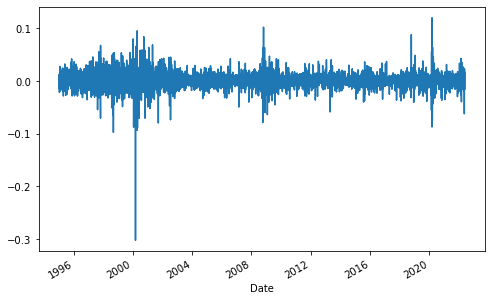

In [15]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [16]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.0005252747938795099

In [17]:
#Around 250 trading days per year
avg_returns_a = PG['simple_return'].mean()*250
avg_returns_a

0.13131869846987748

In [18]:
print(str(round(avg_returns_a, 5)*100) + '%')

13.132%


## Log returns
log returns are mainly used for single stock

In [19]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.926645,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.863109,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.751911,-0.014142
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.767796,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.736025,-0.004090


In [20]:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
print(PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2022-05-23    0.022731
2022-05-24    0.017631
2022-05-25   -0.016528
2022-05-26    0.008708
2022-05-27    0.015176
Name: log_return, Length: 6901, dtype: float64


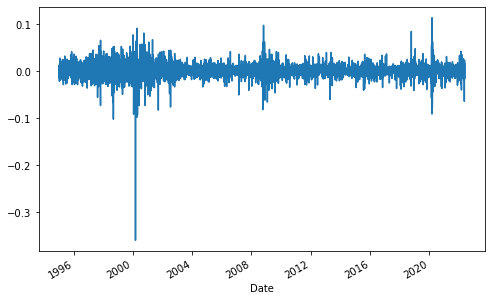

In [21]:
PG['log_return'].plot(figsize=(8,5))
plt.show()

In [22]:
log_return_d = PG['log_return'].mean()
log_return_d

0.0004249036880044746

In [23]:
log_return_a = PG['log_return'].mean()*250
log_return_a

0.10622592200111865

In [24]:
print(str(round(log_return_a, 5)*100) + '%')

10.623000000000001%


## Portfolio of security's rate of return
Portfolio: Procter & Gamble, Microsoft, Ford, General Electric

In [25]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = 'yahoo', start = '1995-1-1')['Adj Close']

In [26]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6901 entries, 1995-01-03 to 2022-05-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6901 non-null   float64
 1   MSFT    6901 non-null   float64
 2   F       6901 non-null   float64
 3   GE      6901 non-null   float64
dtypes: float64(4)
memory usage: 269.6 KB


In [27]:
mydata

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.926647,2.364447,4.307286,32.847824
1995-01-04,7.863111,2.381635,4.423177,32.847824
1995-01-05,7.751916,2.342349,4.384546,32.928326
1995-01-06,7.767796,2.381635,4.384546,32.767300
1995-01-09,7.736032,2.366902,4.461808,32.445240
...,...,...,...,...
2022-05-23,145.050003,260.649994,12.830000,75.459999
2022-05-24,147.630005,259.619995,12.420000,74.519997
2022-05-25,145.210007,262.519989,12.710000,74.529999


In [28]:
#Normalization to 100
mydata.iloc[0]

PG       7.926647
MSFT     2.364447
F        4.307286
GE      32.847824
Name: 1995-01-03 00:00:00, dtype: float64

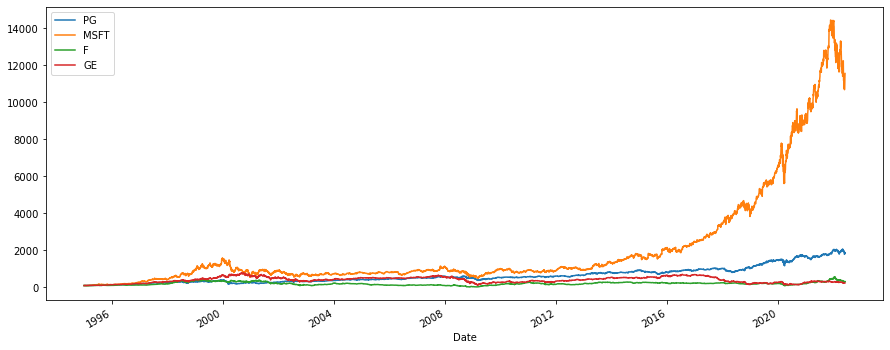

In [29]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6))
plt.show()

## Portfolio of security's Simple rate of return

In [30]:
returns = (mydata / mydata.shift(1)) - 1
returns.tail()

,PG,MSFT,F,GE
Date,,,,
2022-05-23,0.022992,0.032032,0.026400,0.002791
2022-05-24,0.017787,-0.003952,-0.031956,-0.012457
2022-05-25,-0.016392,0.011170,0.023349,0.000134
2022-05-26,0.008746,0.012875,0.032258,0.033275
2022-05-27,0.015292,0.027604,0.038872,0.022724


In [31]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [32]:
np.dot(returns, weights)

array([        nan,  0.00653987, -0.00922989, ...,  0.00456537,
        0.0217886 ,  0.02612322])

In [33]:
annual_returns = returns.mean()*250
annual_returns

PG      0.131319
MSFT    0.221268
F       0.122391
GE      0.083260
dtype: float64

In [34]:
np.dot(annual_returns, weights)

0.13955934847142043

In [35]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
print(pfolio_1)

13.956%


In [36]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [37]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%'
print(pfolio_1, 'in return')
print(pfolio_2, 'in return')

13.956% in return
16.356% in return


## Indices' rate of return

In [38]:
indices = ['^GSPC', '^IXIC', '^GDAXI', '^DJI']
ind_data = pd.DataFrame()

for i in indices:
    ind_data[i] = wb.DataReader(i, data_source = 'yahoo', start= '1997-1-1')['Adj Close']

In [39]:
ind_data

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
1996-12-31,740.739990,1291.030029,NaN,6448.270020
1997-01-02,737.010010,1280.699951,2820.810059,6442.490234
1997-01-03,748.030029,1310.680054,2863.260010,6544.089844
1997-01-06,747.650024,1316.400024,2890.199951,6567.180176
1997-01-07,753.229980,1327.729980,2876.340088,6600.660156
...,...,...,...,...
2022-05-23,3973.750000,11535.269531,14175.400391,31880.240234
2022-05-24,3941.479980,11264.450195,13919.750000,31928.619141
2022-05-25,3978.729980,11434.740234,14007.929688,32120.279297


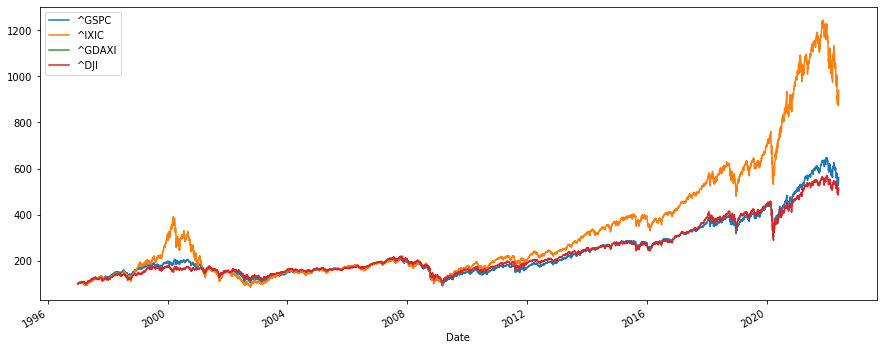

In [40]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize = (15,6))
plt.show()

In [41]:
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
2022-05-23,0.018555,0.015910,0.013839,0.019779
2022-05-24,-0.008121,-0.023478,-0.018035,0.001518
2022-05-25,0.009451,0.015117,0.006335,0.006003
2022-05-26,0.019883,0.026753,0.015945,0.016093
2022-05-27,0.024742,0.033259,0.016225,0.017642


In [42]:
ind_annual_returns = ind_returns.mean()*250
ind_annual_returns

^GSPC     0.086600
^IXIC     0.119151
^GDAXI    0.076626
^DJI      0.081710
dtype: float64

# Risk of Security

In [43]:
sec_tickers = ['PG', 'BEI.DE']
sec_data = pd.DataFrame()

for s in sec_tickers:
    sec_data[s] = wb.DataReader(s, data_source = 'yahoo', start = '2012-1-1')['Adj Close']

In [44]:
sec_data.tail()

,PG,BEI.DE
Date,,
2022-05-23,145.050003,95.519997
2022-05-24,147.630005,95.379997
2022-05-25,145.210007,95.379997
2022-05-26,146.479996,94.800003
2022-05-27,148.720001,94.800003


In [45]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [46]:
sec_returns

,PG,BEI.DE
Date,,
2012-01-03,NaN,NaN
2012-01-04,-0.000449,-0.004606
2012-01-05,-0.004200,-0.003045
2012-01-06,-0.002408,-0.002262
2012-01-09,0.004210,0.000453
...,...,...
2022-05-23,0.022731,0.016892
2022-05-24,0.017631,-0.001467
2022-05-25,-0.016528,0.000000


## PG

In [47]:
sec_returns['PG'].mean()

0.00042504699418922774

In [48]:
sec_returns['PG'].mean() * 250

0.10626174854730694

In [49]:
sec_returns['PG'].std()

0.011164785824935181

In [50]:
sec_returns['PG'].std() * 250 ** 0.5

0.17653076397378556

## Beiersdorf

In [51]:
sec_returns['BEI.DE'].mean()

0.00031418408655661134

In [52]:
sec_returns['BEI.DE'].mean() * 250

0.07854602163915284

In [53]:
sec_returns['BEI.DE'].std()

0.012582398350245364

In [54]:
sec_returns['BEI.DE'].std() * 250 ** 0.5

0.19894518607160191

---

In [55]:
print(sec_returns['PG'].mean() * 250)
print(sec_returns['BEI.DE'].mean() * 250)

0.10626174854730694
0.07854602163915284


In [56]:
sec_returns[['PG', 'BEI.DE']].mean() * 250

PG        0.106262
BEI.DE    0.078546
dtype: float64

In [57]:
sec_returns[['PG', 'BEI.DE']].std() * 250 ** 0.5

PG        0.176531
BEI.DE    0.198945
dtype: float64

---

## Covariance and Correlation

In [58]:
PG_var = sec_returns['PG'].var()
PG_var

0.00012465244251667353

In [59]:
BEI_var = sec_returns['BEI.DE'].var()
BEI_var

0.00015831674824425725

In [60]:
PG_var_a = sec_returns['PG'].var() * 250
PG_var_a

0.03116311062916838

In [61]:
BEI_var_a = sec_returns['BEI.DE'].var() * 250
BEI_var_a

0.039579187061064315

---

In [62]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000125,0.000037
BEI.DE,0.000037,0.000158


In [63]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,PG,BEI.DE
PG,0.031163,0.009264
BEI.DE,0.009264,0.039579


In [64]:
corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.264015
BEI.DE,0.264015,1.000000


## Portfolio Risk (variance)

In [65]:
#Equal weights scheme
weights = np.array([0.5, 0.5])

In [66]:
#Portfolio variance
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.022317716496415615

In [67]:
#Portfolio Volatillity

In [68]:
pfolio_vol = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights)) ** 0.5
pfolio_vol

0.14939115267115258

In [69]:
print(str(round(pfolio_vol, 5) * 100) + '%')

14.939%


---

## Diversifiable and Non-Diversifiable Risk of a portfolio

In [70]:
weights = np.array([0.5, 0.5])

Diversifiable Risk:

In [71]:
PG_var_a = sec_returns['PG'].var() * 250
PG_var_a

0.03116311062916838

In [72]:
BEI_var_a = sec_returns['BEI.DE'].var() * 250
BEI_var_a

0.039579187061064315

In [73]:
dr = pfolio_var - (weights[0] ** 2 * PG_var_a) - (weights[1] ** 2 * BEI_var_a)
dr

0.0046321420738574415

In [74]:
print(str(round(dr, 3) * 100) + '%')

0.5%


Non-Diversifiable Risk:

In [75]:
n_dr_1 = pfolio_var - dr
n_dr_1

0.01768557442255817

In [76]:
n_dr_2 = (weights[0] ** 2 * PG_var_a) + (weights[1] ** 2 * BEI_var_a)
n_dr_2

0.017685574422558175

---

# Efficient Frontier

In [77]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2012-1-1')['Adj Close']

In [78]:
pf_data.tail()

,PG,^GSPC
Date,,
2022-05-23,145.050003,3973.750000
2022-05-24,147.630005,3941.479980
2022-05-25,145.210007,3978.729980
2022-05-26,146.479996,4057.840088
2022-05-27,148.720001,4158.240234


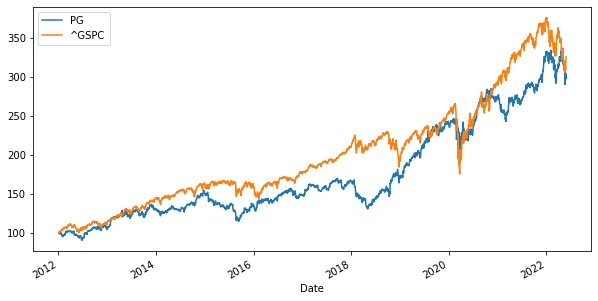

In [79]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize = (10,5))
plt.show()

In [80]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [81]:
log_returns.mean() * 250

PG       0.106262
^GSPC    0.112732
dtype: float64

In [82]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.031163,0.016696
^GSPC,0.016696,0.027997


In [83]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.565243
^GSPC,0.565243,1.000000


In [84]:
num_assets = len(assets)
num_assets

2

In [85]:
arr = np.random.random(2)
arr

array([0.57882937, 0.08885452])

In [86]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.42797258, 0.57202742])

In [87]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [88]:
np.sum(weights * log_returns.mean()) * 250

0.10996301103774586

Expected Portfolio Variance:

In [89]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.02304343665573235

Expected Portfolio Volatility:

In [90]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.151800647744772

---

In [91]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([0.1094788617691682,
  0.10827621301103703,
  0.10858963311770777,
  0.11036252638411807,
  0.10962581382776511,
  0.10834483179177372,
  0.110060330554138,
  0.10868030269679099,
  0.10912163667689463,
  0.10976422103612798,
  0.10856935958227529,
  0.1097993502800371,
  0.11185100813122255,
  0.10867388065161611,
  0.11066323560883004,
  0.11106340797252601,
  0.10766422540662977,
  0.11153473835367288,
  0.10944483026346485,
  0.11145478433348899,
  0.10933457221489316,
  0.11148752545837043,
  0.10729644490170304,
  0.10712636772478674,
  0.11077973315140274,
  0.11233082501394352,
  0.10921905835021548,
  0.10729597609069519,
  0.11163068401353651,
  0.11056937618053966,
  0.10916995828662776,
  0.10894044038173799,
  0.1102931042122386,
  0.11053675773912741,
  0.11033001577903528,
  0.10952904144794273,
  0.10711448546524427,
  0.10735289470241977,
  0.10856351621440209,
  0.11193244202013995,
  0.11001358828822866,
  0.10736064744328001,
  0.11146042387760703,
  0.108818788693

In [92]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns, pfolio_volatilities

(array([0.11124873, 0.1086029 , 0.1106846 , 0.10797892, 0.11032525,
        0.10731532, 0.11197107, 0.1070019 , 0.11059712, 0.11076953,
        0.110372  , 0.11057063, 0.1083721 , 0.10968514, 0.10795475,
        0.10988947, 0.11020901, 0.10902404, 0.10903023, 0.10907396,
        0.10866554, 0.10860537, 0.1123268 , 0.10897203, 0.11162318,
        0.11063934, 0.10847805, 0.10766642, 0.10956028, 0.11006588,
        0.11271309, 0.10993637, 0.1091019 , 0.10967615, 0.11115534,
        0.11124534, 0.10898307, 0.10953141, 0.10973671, 0.10844517,
        0.10970372, 0.10887221, 0.10963774, 0.11063132, 0.10850611,
        0.11080956, 0.1115237 , 0.10668121, 0.10975351, 0.11150076,
        0.10733303, 0.10707993, 0.11053438, 0.1116557 , 0.1090048 ,
        0.11043233, 0.11172559, 0.10685822, 0.10946703, 0.11041029,
        0.10700969, 0.10919226, 0.10983586, 0.10964705, 0.10914479,
        0.10773932, 0.11152125, 0.10946742, 0.10744741, 0.11072967,
        0.10819021, 0.10927942, 0.11123983, 0.10

In [93]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [94]:
portfolios.head()

,Return,Volatility
0,0.111249,0.155465
1,0.108603,0.155137
2,0.110685,0.153051
3,0.107979,0.159057
4,0.110325,0.152167


In [95]:
portfolios.tail()

,Return,Volatility
995,0.109627,0.151936
996,0.110835,0.153574
997,0.109926,0.151793
998,0.109130,0.152972
999,0.107401,0.163912


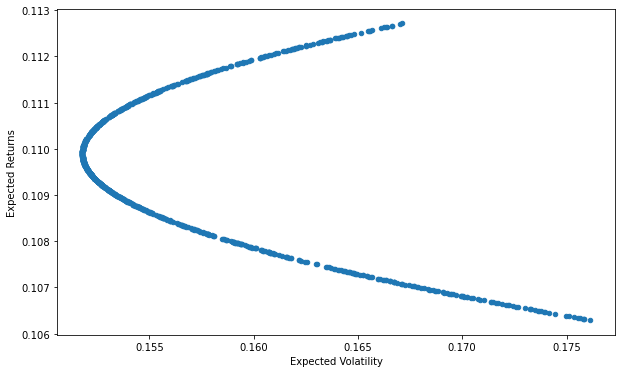

In [96]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.show()

---

In [97]:
tickers = ['PG', '^GSPC']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source = 'yahoo', start = '2017-1-1', end = '2022-1-1')['Adj Close']

In [98]:
sec_returns = np.log(data/data.shift(1))

In [99]:
cov = sec_returns.cov() * 250
cov

,PG,^GSPC
PG,0.039989,0.022531
^GSPC,0.022531,0.037113


In [100]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.02253086514251048

In [101]:
market_var = sec_returns['^GSPC'].var() * 250
market_var

0.03711323235948089

Beta:

In [102]:
PG_beta = cov_with_market / market_var
PG_beta

0.6070844200331362

Expected Return of P&G (Capital Asset Pricing Model (CAPM)):

AU gov bonds (10yrs) = 3.25%

AU market risk premium  = 6%

In [103]:
PG_er = 0.0325 + PG_beta * 0.06
PG_er

0.06892506520198818

Alpha*:

In [104]:
alpha = (PG_er - 0.0325) - PG_beta * (0.06)
alpha

6.938893903907228e-18

## Sharpe Ratio

In [105]:
sharpe = (PG_er - 0.0325) / (sec_returns['PG'].std() * 250 ** 0.5)
sharpe

0.18215105191611633

---

# Monte Carlo Forecasting

In [106]:
from scipy.stats import norm

In [107]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2012-1-1')['Adj Close']

In [108]:
log_returns = np.log(1 + data.pct_change())

In [109]:
log_returns.tail()

,PG
Date,
2022-05-23,0.022731
2022-05-24,0.017631
2022-05-25,-0.016528
2022-05-26,0.008708
2022-05-27,0.015176


<AxesSubplot:xlabel='Date'>

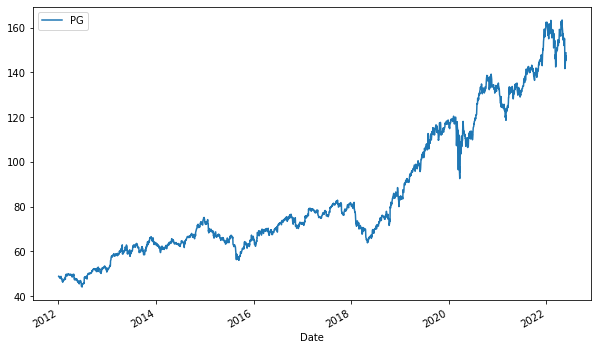

In [110]:
data.plot(figsize = (10,6))

<AxesSubplot:xlabel='Date'>

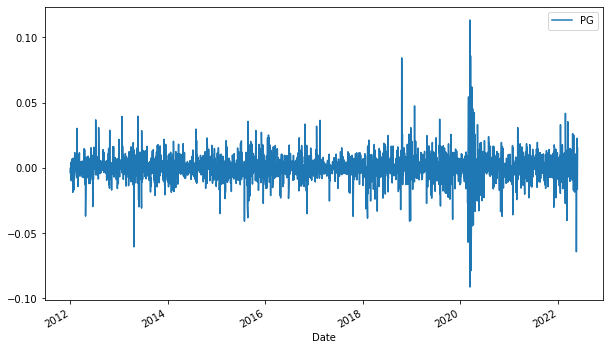

In [111]:
log_returns.plot(figsize = (10,6))

In [112]:
u = log_returns.mean()
u

PG    0.000425
dtype: float64

In [113]:
#Daily stock price
var = log_returns.var()
var

PG    0.000125
dtype: float64

Drift:

In [114]:
drift = u - (0.5 * var)
drift

PG    0.000363
dtype: float64

In [115]:
stdev = log_returns.std()
stdev

PG    0.011165
dtype: float64

---

In [116]:
type(drift)

pandas.core.series.Series

In [117]:
type(stdev)

pandas.core.series.Series

In [118]:
np.array(drift)

array([0.00036272])

In [119]:
np.array(stdev)

array([0.01116479])

In [120]:
norm.ppf(0.95)

1.6448536269514722

In [121]:
x = np.random.rand(10,2)
x

array([[0.44304891, 0.42654707],
       [0.75435042, 0.37250197],
       [0.5602489 , 0.06429835],
       [0.21811921, 0.70997539],
       [0.97422219, 0.99534003],
       [0.10988685, 0.7726542 ],
       [0.97952872, 0.29160316],
       [0.1518216 , 0.08578531],
       [0.09647026, 0.21586676],
       [0.05932332, 0.18985719]])

In [122]:
norm.ppf(x)

array([[-0.14324357, -0.18517198],
       [ 0.68824396, -0.32523404],
       [ 0.1516003 , -1.51965898],
       [-0.77856089,  0.55331282],
       [ 1.94682577,  2.60008948],
       [-1.22713007,  0.74761637],
       [ 2.04411131, -0.54870733],
       [-1.02865209, -1.36717452],
       [-1.30192938, -0.78622871],
       [-1.56047936, -0.87842269]])

In [123]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 1.08368255,  0.87302107],
       [ 0.05427293,  0.49756824],
       [-0.77618176,  0.12273588],
       [ 1.70389258,  1.00944988],
       [ 0.40964431,  0.60398355],
       [-0.31385663,  1.2510022 ],
       [ 1.11776281,  0.55507012],
       [-1.12656806, -1.26062695],
       [-1.89470417, -0.18599688],
       [ 0.22891217,  1.6737291 ]])

In [132]:
t_intervals = 1000
iterations = 10

In [133]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.99957979, 0.99338213, 0.99360827, ..., 0.98498222, 1.00624772,
        0.99421182],
       [0.98766177, 1.00208653, 0.99475461, ..., 1.00685379, 1.00424154,
        1.00897819],
       [0.98765499, 0.99920025, 1.00789416, ..., 0.9948179 , 1.01067777,
        0.99177881],
       ...,
       [1.00386976, 1.02648639, 1.00058134, ..., 1.00423585, 0.99471959,
        1.00905356],
       [0.98425151, 0.99749876, 0.99704262, ..., 1.01954904, 1.012141  ,
        1.00106152],
       [1.00423319, 0.99632459, 1.00813419, ..., 1.00338608, 1.00371672,
        1.01156654]])

---

In [134]:
S0 = data.iloc[-1]
S0

PG    148.720001
Name: 2022-05-27 00:00:00, dtype: float64

In [135]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [136]:
price_list[0] = S0
price_list

array([[148.72000122, 148.72000122, 148.72000122, ..., 148.72000122,
        148.72000122, 148.72000122],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [137]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]* daily_returns[t]

In [139]:
price_list

array([[148.72000122, 148.72000122, 148.72000122, ..., 148.72000122,
        148.72000122, 148.72000122],
       [146.88506014, 149.03031062, 147.93990652, ..., 149.73929734,
        149.35080299, 150.05523718],
       [145.07176272, 148.91112391, 149.10776746, ..., 148.96333296,
        150.94553595, 148.82160451],
       ...,
       [258.37423019, 176.30399864, 237.25235063, ..., 252.74928076,
        160.11353411, 195.16142883],
       [254.30522497, 175.86302001, 236.55070608, ..., 257.69028702,
        162.05747317, 195.36859719],
       [255.38174682, 175.21665139, 238.47485501, ..., 258.56284572,
        162.65979548, 197.62833611]])

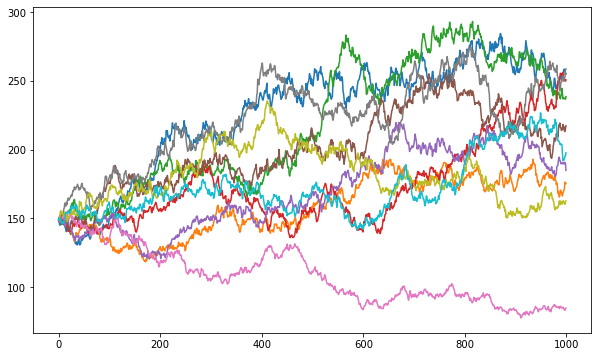

In [140]:
plt.figure(figsize = (10,6))
plt.plot(price_list)
plt.show()

---

# Monte Carlo: Black-Scholes Merton

In [141]:

def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [142]:
norm.cdf(0)

0.5

In [143]:
norm.cdf(0.25)

0.5987063256829237

In [144]:
norm.cdf(0.75)

0.7733726476231317

In [156]:
norm.cdf(9)

1.0

In [161]:
def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [162]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2012-1-1')['Adj Close']

In [163]:
S = data.iloc[-1]
S

PG    148.720001
Name: 2022-05-27 00:00:00, dtype: float64

In [164]:
log_returns = np.log(1 + data.pct_change())

In [165]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176531
dtype: float64

In [166]:
r = 0.0325
K = 110
T = 1

In [168]:
#How much can we expect if the option is exercised
d1(S, K, r, stdev, T)

PG    1.980768
dtype: float64

In [169]:
#The amount we must pay when exercising the option
d2(S, K, r, stdev, T)

PG    1.804237
dtype: float64

In [170]:
BSM(S, K, r, stdev, T)

PG    42.487173
Name: 2022-05-27 00:00:00, dtype: float64

---

# Monte Carlo: Euler Discretization

In [171]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2012-1-1')['Adj Close']

In [172]:
log_returns = np.log(1 + data.pct_change())

In [173]:
r = 0.325

In [174]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176531
dtype: float64

In [176]:
stdev = np.array(stdev)
stdev

array([0.17653083])

In [178]:
T = 1
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [179]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [180]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [181]:
S

array([[148.72000122, 148.72000122, 148.72000122, ..., 148.72000122,
        148.72000122, 148.72000122],
       [150.0093993 , 149.02233776, 147.02005962, ..., 150.56882144,
        148.3990824 , 149.92794101],
       [153.27565132, 151.47470137, 148.06319648, ..., 153.0251331 ,
        148.55075044, 148.09863624],
       ...,
       [165.26642892, 180.81078028, 214.12769723, ..., 250.02165037,
        201.67410509, 210.33537754],
       [166.76659035, 180.01115392, 214.77396602, ..., 248.65132245,
        197.44424649, 208.38121108],
       [166.00861606, 176.03459818, 213.2085332 , ..., 252.89535776,
        199.24545603, 207.98101157]])

In [182]:
S.shape

(251, 10000)

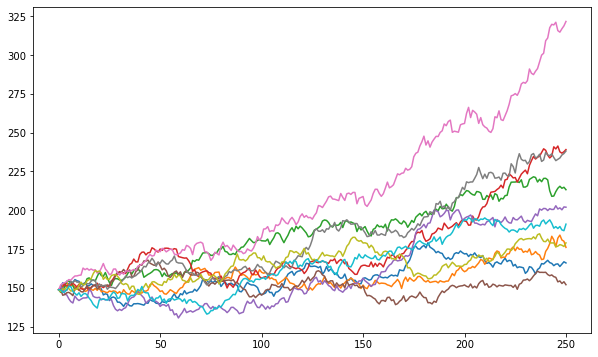

In [186]:
plt.figure(figsize = (10,6))
plt.plot(S[:, :10])
plt.show()

In [187]:
p = np.maximum(S[-1] - 110, 0)
p

array([ 56.00861606,  66.03459818, 103.2085332 , ..., 142.89535776,
        89.24545603,  97.98101157])

In [188]:
p.shape

(10000,)

In [189]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

69.38702771143383